# Previous Code

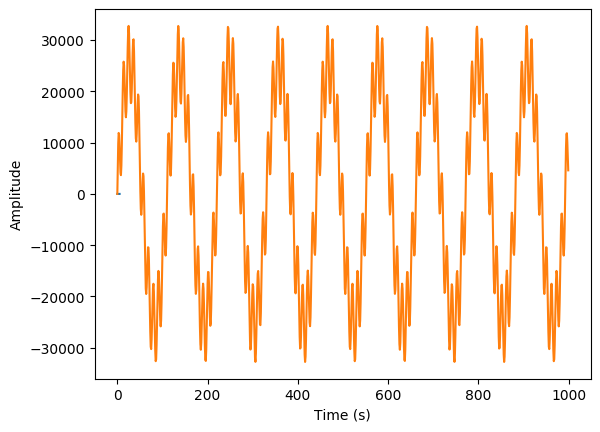

In [8]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100 # Hz
DURATION = 5 # seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint = False)
    frequencies = x * freq
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# generate a 2Hz sine wave, lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show

_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)
plt.plot(normalized_tone[:1000])
plt.show()

# Using the Fast Fourier Transform (FFT)

This code calculates the Fourier transform of the audio generated in our previous code. The values generated are plotted below. 

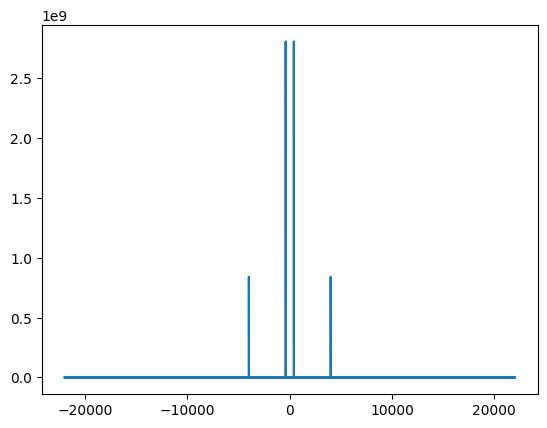

In [9]:
SAMPLE_RATE = 44100 # Hz
DURATION = 5 # seconds
from scipy.fft import fft, fftfreq
import numpy as np
from matplotlib import pyplot as plt

# number of samples in normalized_tone
N = SAMPLE_RATE * DURATION
yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In our plot above, there are four peaks. Two of these peaks are positive and two of them are negative, and these positive and negative peaks mirror each other. Looking closely, we can see that these positive values are 400 Hz and 4000 Hz, which correspond to the frequencies we put in the mixed audio. Great! The Fourier transform has successfully returned our complicated signal into the frequencies which it contains. Since we only put in two frequencies into our audio signal, only two frequencies come out. This negative/positive symmetry is a side effect of putting **real-valued input** into the Fourier transform. This is a topic which we will return to later. For now, let us take a closer look at our code. 

In [ ]:
yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

After our imports and defining N, the total number of samples in the signal, we have this segment of code which is responsible for calculating the Fourier transform. The function *fft()* calculates the transform itself. The function *fftfreq()* calculates the frequencies in the center of each bin in the output of *fft()*. A bin is a range of values that have been group, like in a histogram. This function is necessary to plot the x-axis on our frequency spectrum. Finally, after getting the Fourier transform and their corresponding frequencies, we can plot them. But, what kind of processing did we do to *yf* before plotting its values? Looking back at our code, we needed to call *np.abs()* on *yf* because it has complex values. Taking the absolute value of a complex number gives us the overall magnitude for the number